In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages
# plt.rcParams['text.usetex'] = True
# plt.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}'] #for \text command


In [42]:

num_norms = list([i + 1 for i in range(1, 31)])

def construct_df(benchmark):

    true_cardinality = pd.read_csv(f"../results/accuracy_acyclic/{benchmark}/truecardinality_{benchmark}_full_estimations.csv")


    df_data = pd.DataFrame()
    for num_norm in num_norms:
        df = pd.read_csv(f"../results/num_norms_effectiveness/{benchmark}/lpbound_{benchmark}_num_norms_{num_norm}.csv")
        df["number_norms"] = num_norm
        df["truecardinality_Estimate"] = true_cardinality["truecardinality_Estimate"]
        df["error_lp"] = df["lpbound_Estimate"] / df["truecardinality_Estimate"]

        df_data = pd.concat([df_data, df])

    df_data["min_error_query"] = df_data.groupby("QueryID")["error_lp"].transform("min")
    df_data["relative_error"] = df_data["error_lp"] / df_data["min_error_query"]

    return df_data


df_data = construct_df("joblight")

print(df_data[df_data["QueryID"] == 1])
print(df_data.columns)

   QueryID  lpbound_Estimate  number_norms  truecardinality_Estimate  \
0        1      13174.900379             2                       715   
0        1       9234.734255             3                       715   
0        1       7017.850235             4                       715   
0        1       7017.850235             5                       715   
0        1       7017.850235             6                       715   
0        1       7017.850235             7                       715   
0        1       7017.850235             8                       715   
0        1       7017.850235             9                       715   
0        1       7017.850235            10                       715   
0        1       7017.850235            11                       715   
0        1       7017.850235            12                       715   
0        1       7017.850235            13                       715   
0        1       7017.850235            14                      

In [48]:
df_data = construct_df("joblight")

 
# Function to create and save the plot
def plot_num_norms_sensitivity(df_data, x_range=12, multiplier=2, y_lim=3.5):
    df_data = df_data[df_data["number_norms"] <= x_range]
    # Calculate mean and standard deviation for each number of MCVs
    df_stats = df_data.groupby("number_norms")["relative_error"].agg(["mean", "std"]).reset_index()

    # Set up the matplotlib figure
    fig, ax = plt.subplots(figsize=(5, 2.5))
 
    # Plot mean line
    sns.lineplot(data=df_stats, x="number_norms", y="mean", ax=ax, color='blue')
 
    # Add light blue shaded area for standard deviation
    ax.fill_between(df_stats["number_norms"],
                    df_stats["mean"] - multiplier * df_stats["std"],
                    df_stats["mean"] + multiplier * df_stats["std"],
                    alpha=0.6, color='lightblue')
 
    # Set plot labels
    # plt.ylabel(r"$\frac{\text{Error\ for \#\ MCVs = x}}{\text{Error\ for \#\ MCVs = 5000}}$", fontsize=16)
    plt.ylabel(r"$\frac{\mathrm{Error\ for\ p \in \{1,\dots,k,\infty\}}}{\mathrm{Error\ for p \in \{1,\dots,30,\infty\}}}$", fontsize=12)

    # plt.ylabel("error", fontsize=16)
    plt.xlabel(r"Norm $k$")
    ax.set_ylim(0.8, y_lim)
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.1f}'.format(x)))

    # add a horizontal line at y = 1
    ax.axhline(y=0.99, color='red', linestyle='--')
    
    # Adjust layout
    plt.tight_layout()
 
    # Save as PDF
    pdf_filename = f"plots/num_norms_sensitivity.pdf"
    with PdfPages(pdf_filename) as pdf:
        pdf.savefig(fig)
 
    plt.show()
 
    # print(f"Plot saved as {pdf_filename}, and {eps_filename}")
 
# Example usage:
# Adjust the multiplier value to control the width of the error bands
# plot_mcv_sensitivity(df_data, multiplier=0.2)
 
# You can easily generate plots with different error band widths:
# plot_mcv_sensitivity(df_data, multiplier=1)
# plot_mcv_sensitivity(df_data, multiplier=3)

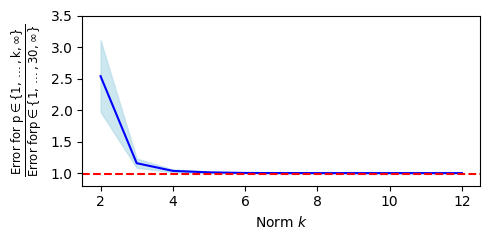

In [52]:
df_data = construct_df("joblight")
plot_num_norms_sensitivity(df_data, multiplier=0.25, y_lim=3.5)